## EDA LAB

The General Social Survey (GSS) is a bi-annual nationally representative survey of Americans, with almost 7000 different questions asked since the survey began in the 1970s. It has straightforward questions about respondents' demographic information, but also questions like "Does your job regularly require you to perform repetitive or forceful hand movements or involve awkward postures?" or "How often do the demands of your job interfere with your family life?" There are a variety of controversial questions. No matter what you're curious about, there's something interesting in here to check out. The codebook is 904 pages (use CTRL+F to search it).

The data and codebook are available at:
https://gss.norc.org/us/en/gss/get-the-data.html

The datasets are so large that it might make sense to pick the variables you want, and then download just those variables from:
https://gssdataexplorer.norc.org/variables/vfilter

Here is your task:
1. Download a small (5-15) set of variables of interest.
2. Write a short description of the data you chose, and why. (1 page)

I choose the variables hrs2 (hours typically worked in a week), divorce, spwrk (spouse working status), sibs (number of siblings), children, educ (highest year of education completed). The variables year and ID are also included by default. This combination of variables allows for some interesting analysis on the relationships between variables. Visualizations and plots for variables such as divorce and hours worked can reveal potential relationships. Number of siblings and number of children is another interesting relationship. I am also curious to see if there are any unexpected relationships between variables, and explore why these relationships may occur.

3. Load the data using Pandas. Clean them up for EDA. Do this in a notebook with comments or markdown chunks explaining your choices.

4. Produce some numeric summaries and visualizations. (1-3 pages)
5. Describe your findings in 1-2 pages.

The first important finding comes from the data descriptions. While many of the columns are string data and do not provide statistics, I found it interesting that the mean for education is about 13 years after kindergarten, which makes sense since many people go to college, and most finish high school. I also noticed that the median and 25th percentile of education was 12.0, indicating that over a quarter of respondents are high school graduates who did not go on to college. The data also suffers a lot from missing observations, as seen in the 70,000 missing observations on hrs2.

The children and siblings graph shows the number of observations at each number from 0-10. It shows a few interesting phenomena, firstly that there are a large number of observations of people with no children, and a very low number of with people with no siblings. This suggests not a lot of only children. Another cool thing about this graph is that the number of people with 4+ siblings is higher than the number of people with 4+ children. This is because of the recursive relationship that siblings have. A family with 2 children will provide 2 observations of people with 1 sibling, while a family with 7 children will provide 7 observations of people with 6 siblings.

The final plot shows the divorce rate at each number of hours worked. While the plot has gaps in the data due to no observations at certain numbers of hours, it still has important findings. Notably, the divorce rate at 40 hours a week, the standard amount, is far lower than divorce rates at higher number of hours around 80 or 90. This is what I expected to see, as spending less time together will lead to less relationship satisfaction.

6. If you have other content that you think absolutely must be included, you can include it in an appendix of any length.

For example, you might want to look at how aspects of a person's childhood family are correlated or not with their career or family choices as an adult. Or how political or religious affiliations correlate with drug use or sexual practices. It's an extremely wide-ranging survey.

Feel free to work with other people in groups, and ask questions!

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72390 entries, 0 to 72389
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   year      72390 non-null  int64  
 1   id_       72390 non-null  int64  
 2   hrs2      1539 non-null   object 
 3   divorce   44390 non-null  object 
 4   spwrksta  37628 non-null  object 
 5   sibs      70868 non-null  object 
 6   childs    72374 non-null  object 
 7   educ      71950 non-null  float64
 8   ballot    50515 non-null  object 
dtypes: float64(1), int64(2), object(6)
memory usage: 5.0+ MB
None

Data Description:
                 year           id_  hrs2 divorce          spwrksta   sibs  \
count   72390.000000  72390.000000  1539   44390             37628  70868   
unique           NaN           NaN    64       5                11     44   
top              NaN           NaN    40      NO  WORKING FULLTIME      2   
freq             NaN           NaN   590   34738             20328  

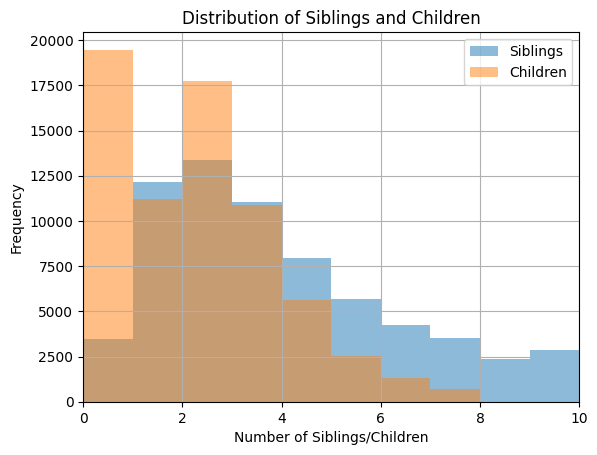

<ipython-input-51-4f5305316baa>:70: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['hrs2'].fillna(df['hrs2'].mean(), inplace=True)


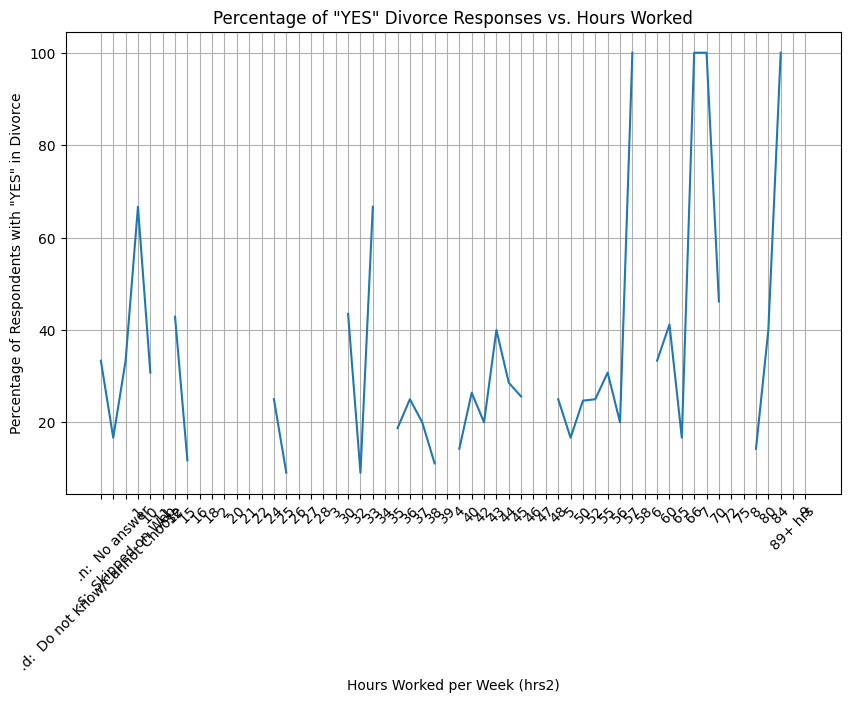

In [51]:
import pandas as pd
import re
import matplotlib.pyplot as plt
import numpy as np
# Used chatgpt for code assistance

# Load the dataset
file_path = "/mnt/data/GSS(Data).csv"
df = pd.read_csv('GSS(Data).csv')

# Function to clean the 'educ' column
# Cleaning the education column so that each value corresponds to the number of years in education
# Allows for easier visualization and for a mean and other statistics to be calculated
def clean_education(educ_value):

    match = re.search(r'(\d+)', str(educ_value))  # Extract the first number found
    if match:
        years = int(match.group(1))
        if "college" in educ_value:
            return 12 + years  # College years are added to 12
        return years  # Grades remain as they are
    return None  # If no number is found, return None

# Replacing missing values with null
df.replace('.i:  Inapplicable', pd.NA, inplace=True)

# Apply the cleaning function to the 'educ' column
df['educ'] = df['educ'].apply(clean_education)
# Display basic information about the DataFrame
print(df.info())
print("\nData Description:\n", df.describe(include='all'))
# Check for missing values
print("\nMissing values per column:\n", df.isnull().sum())
# Display the first few rows of the DataFrame
print("\nFirst few rows of the data:\n", df.head())
# Example: Analyze the 'hrs2' (hours worked per week) column
print("\nSummary of 'hrs2' column:\n", df['hrs2'].describe())


# Create the scatter plot
df['childs'] = pd.to_numeric(df['childs'], errors='coerce')
df['sibs'] = pd.to_numeric(df['sibs'], errors='coerce')

# Ensure 'childs' and 'sibs' are numeric, coercing errors to NaN
df['childs'] = pd.to_numeric(df['childs'], errors='coerce')
df['sibs'] = pd.to_numeric(df['sibs'], errors='coerce')

# Drop rows with NaN values in either 'childs' or 'sibs'
df_cleaned = df.dropna(subset=['childs', 'sibs'])

plt.hist(df_cleaned['sibs'], alpha=0.5, label='Siblings', range=(0,10))
plt.hist(df_cleaned['childs'], alpha=0.5, label='Children', range=(0,10))
plt.xlabel('Number of Siblings/Children')
plt.ylabel('Frequency')
plt.title('Distribution of Siblings and Children')
plt.legend()
plt.grid(True)
plt.xlim(0,10) #Set the x axis limit
plt.show()

df.dropna(how='all', inplace=True)


percentage_yes = df.groupby('hrs2')['divorce'].value_counts(normalize=True).unstack() * 100

# Convert 'hrs2' column to numeric, coercing errors to NaN
df['hrs2'] = pd.to_numeric(df['hrs2'], errors='coerce')

# Fill NaN values in 'hrs2' with the mean of the column
df['hrs2'].fillna(df['hrs2'].mean(), inplace=True)

# Convert 'hrs2' to integers
df['hrs2'] = df['hrs2'].astype(int)
# Check if 'YES' column exists before plotting
if 'YES' in percentage_yes.columns:
    plt.figure(figsize=(10, 6))
    plt.plot(percentage_yes.index, percentage_yes['YES'])
    plt.xlabel('Hours Worked per Week (hrs2)')
    plt.ylabel('Percentage of Respondents with "YES" in Divorce')
    plt.title('Percentage of "YES" Divorce Responses vs. Hours Worked')
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.show()
else:
    print("'YES' column not found in percentage_yes DataFrame.")



